#High Pass Fully Convolutional Network

**What is it?** \\
A network for the localization of inpainting on images. \\
**How did we adapt it?** \\
We trained it on video frames inpainted with three different inpainting techniques (OPN, STTN, GMCNN) using and not using TCN post-processing. \\
**Reference github**: [testo del link](https://github.com/lihaod/Deep_inpainting_localization)

#Requirements

In [ ]:
!pip install opencv-python==4.5.2.54
!pip install scipy==1.4.1
!pip install tensorflow-gpu==1.15
!pip install tensorflow-addons==0.10.0
!pip install tf-slim==1.1.0
!pip install tflearn==0.5.0
!pip install typeguard==2.12.1
!pip install git+https://github.com/giuliano-oliveira/gdown_folder.git

#Import Code#

In [ ]:
!gdown https://drive.google.com/uc?id=13bzOI4iRMCnYgrPzZG8jaH0vhl92kY6D
!unzip Deep_inpainting_localization-master.zip

Downloading...
From: https://drive.google.com/uc?id=13bzOI4iRMCnYgrPzZG8jaH0vhl92kY6D
To: /content/Deep_inpainting_localization-master.zip
100% 17.4k/17.4k [00:00<00:00, 26.6MB/s]
Archive:  Deep_inpainting_localization-master.zip
   creating: Deep_inpainting_localization-master/
  inflating: Deep_inpainting_localization-master/.gitignore  
  inflating: Deep_inpainting_localization-master/LICENSE  
  inflating: Deep_inpainting_localization-master/hp_fcn.py  
   creating: Deep_inpainting_localization-master/utils/
  inflating: Deep_inpainting_localization-master/utils/LICENSE  
  inflating: Deep_inpainting_localization-master/utils/TensorflowUtils.py  
  inflating: Deep_inpainting_localization-master/utils/__init__.py  
  inflating: Deep_inpainting_localization-master/utils/bilinear_upsample_weights.py  
  inflating: Deep_inpainting_localization-master/utils/losses.py  
  inflating: Deep_inpainting_localization-master/utils/metrics.py  
  inflating: Deep_inpainting_localization-master/ut

#Import Weights and Demo Data

In [ ]:
import gdown
import os
gdown.download_folder('https://drive.google.com/drive/u/1/folders/1g-YkQPEBfd9DgWA_4wpSxik6F6WXA97U', quiet=True)
!mv weigths Deep_inpainting_localization-master
os.chdir('Deep_inpainting_localization-master/')
gdown.download_folder('https://drive.google.com/drive/u/1/folders/1Gnv0v_AxtbPX6uVRBUpp2_4p2XdfH8L8', quiet=True)
!clear

Downloading...
From: https://drive.google.com/uc?id=11-l_bSG4OdpwD7Kf2IPJ_iFACFAO0b3H
To: /content/airplane_6_bis.zip
100% 4.66M/4.66M [00:00<00:00, 164MB/s]
Archive:  airplane_6_bis.zip
   creating: airplane_6_bis/
  inflating: airplane_6_bis/0000.png  
  inflating: airplane_6_bis/0001.png  
  inflating: airplane_6_bis/0002.png  
  inflating: airplane_6_bis/0003.png  
  inflating: airplane_6_bis/0004.png  
  inflating: airplane_6_bis/0005.png  
  inflating: airplane_6_bis/0006.png  
  inflating: airplane_6_bis/0007.png  
  inflating: airplane_6_bis/0008.png  
  inflating: airplane_6_bis/0009.png  
  inflating: airplane_6_bis/0010.png  
  inflating: airplane_6_bis/0011.png  
  inflating: airplane_6_bis/0012.png  
  inflating: airplane_6_bis/0013.png  
  inflating: airplane_6_bis/0014.png  
  inflating: airplane_6_bis/0015.png  
  inflating: airplane_6_bis/0016.png  
  inflating: airplane_6_bis/0017.png  
  inflating: airplane_6_bis/0018.png  
  inflating: airplane_6_bis/0019.png  
  in

#Run Example Code

In [ ]:
!python3 hp_fcn.py --data_dir mini_set/airplane_6_bis_frames/ --msk_dir mini_set/airplane_6_bis_msk/  --logdir weigths/checkpoint_hp_fcn_10_epoch_aug_OPN_double_FULL/ --mode visual

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.








hp_fcn.py
--------------FLAGS--------------
?: False
alsologtostderr: False
batch_size: 1
data_dir: mini_set/airplane_6_bis_frames/
epoch: 10
filter_learnable: True
filter_type: d1
focal_gamma: 2.0
img_aug: False
img_size: None
keep_ckpt: 1
learning_rate: 0.0001
log_dir: 
logdir: weigths/checkpoint_hp_fcn_10_epoch_aug_OPN_double_FULL/
logger_levels: {}
logtostderr: False
loss: focal
lr_decay: 0.5
lr_decay_freq: 1.0
mode: visual
msk_dir: mini_set/airplane_6_bis_msk/
only_check_args: False
op_conversion_fallback_to_while_loop: False
optimizer: Adam
pdb: False
pdb_post_mortem: False
profile_file: None
reset_global_step: Fals

#Visualize the Results

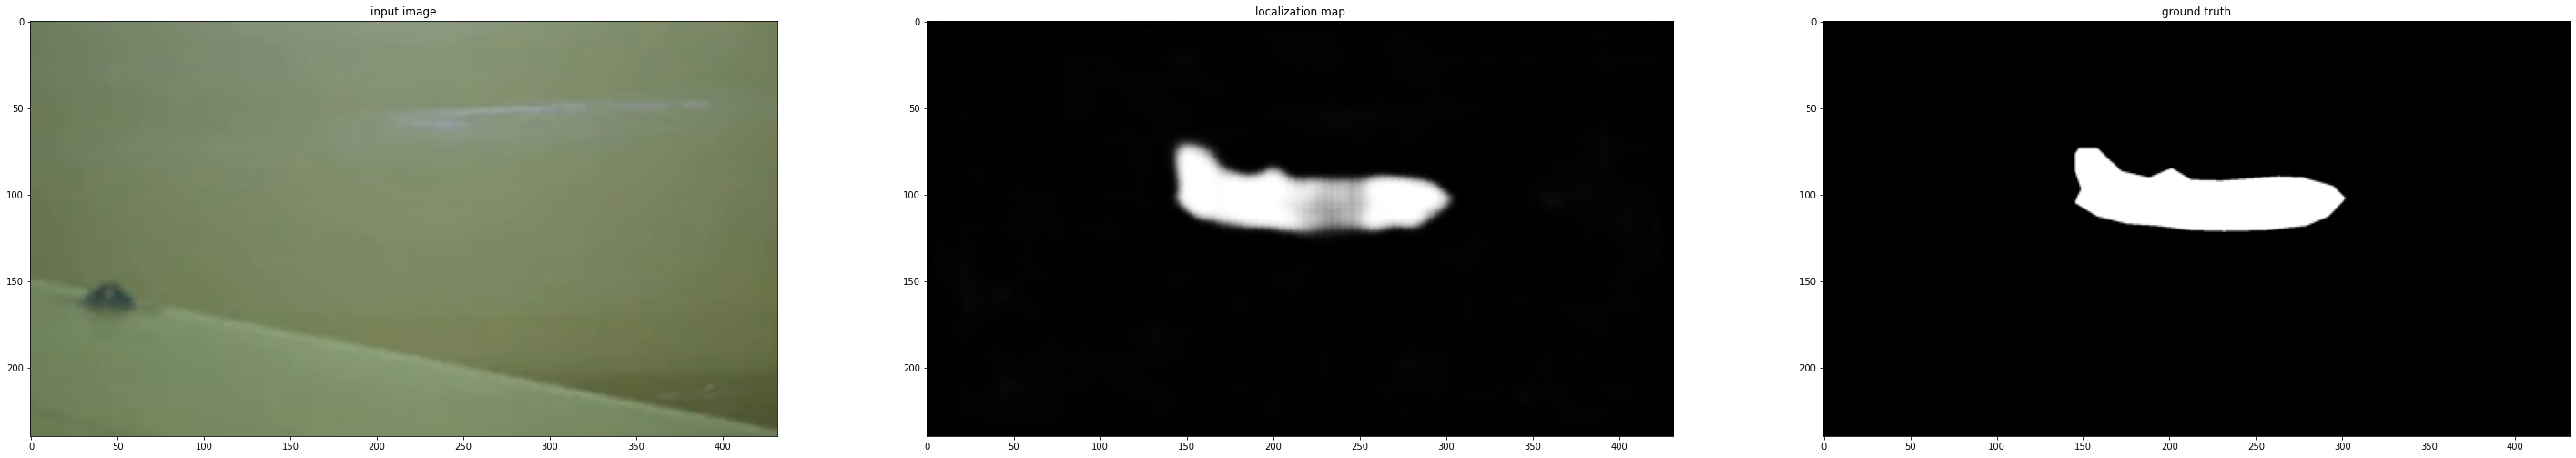

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
result=cv2.imread('visual/0000.png', cv2.COLOR_BGR2RGB)
mask=cv2.imread('mini_set/airplane_6_bis_msk/0000 (1).png', cv2.COLOR_BGR2RGB)
input=cv2.imread('mini_set/airplane_6_bis_frames/0000.png', cv2.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = [50, 45]
plt.figure()
plt.subplot(1,3,1)
plt.imshow(np.array(input))
plt.title('input image')
plt.subplot(1,3,2)
plt.imshow(result, cmap='gray')
plt.title('localization map')
plt.subplot(1,3,3)
plt.imshow(mask, cmap='gray')
plt.title('ground truth')
plt.show()

#Exercise
Import the dataset and check what happens when we test a model trained on not post-processed frames with post-processed ones and viceversa. \\
 You can find the models in the following path 'weights/' , the one marked with 'tcn' are the models trained on post-processed frames. \\

 Can you improve the results? Can you remove some false positives?

In [ ]:
!gdown https://drive.google.com/uc?id=1le7-eZhwTNrd5_CeeHeVhltPvSWCtgP4
!unzip OPN.zip

In [ ]:
#YOUR CODE#